In [17]:
"""
To classify the input skin into one of the 6 skin tones
"""
import cv2
import numpy as np
import pandas as pd
import sklearn
from skin_detection import skin_detection
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

In [18]:
df = pd.read_csv("skin_tone_dataset.csv")


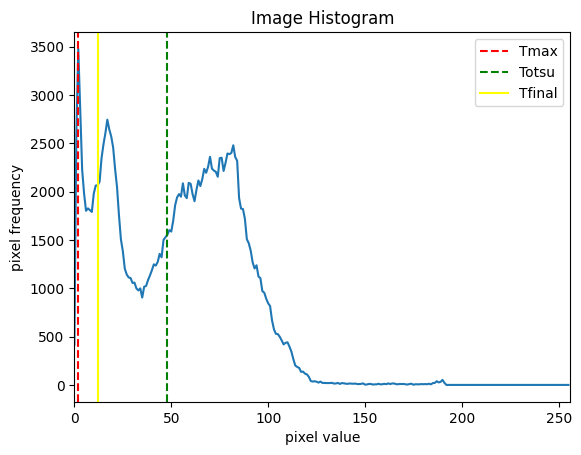

In [19]:
y = skin_detection(
    r"test images/15.jpg")


In [20]:
values_vector = df.iloc[:, [1, 2, 3]].values
input_mat = np.repeat(y[np.newaxis, :], len(df.index), axis=0)
len(input_mat)

35

In [21]:
sim_matrix = cosine_similarity(values_vector, input_mat)
np.where(sim_matrix[:, 0] == max(sim_matrix[:, 0]))[0][0]


5

In [22]:
df['cs'] = [cosine_similarity([df.iloc[i, [1, 2, 3]].values], [y])[0][0] for i in range(len(df))]
df.sort_values(by=['cs'], ascending=False, inplace=True)
df

,Type,R,G,B,cs
5,2,251,252,244,0.807182
0,1,255,255,255,0.806774
1,1,255,255,255,0.806774
2,1,255,255,255,0.806774
3,1,255,255,255,0.806774
4,1,250,249,247,0.805636
11,2,244,241,236,0.803264
6,2,252,248,237,0.801749
12,3,255,250,225,0.798878
10,2,244,236,232,0.797947


In [23]:
df.sort_values(by=['cs'], ascending=False).iloc[0]['Type']


2.0

In [60]:
# Read the dataset
df = pd.read_csv("skin_tone_dataset.csv")

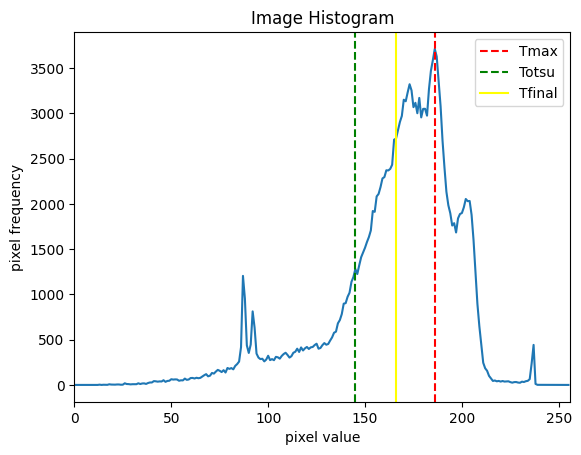

[  7.80526865 213.63204518 108.4527291 ]


In [80]:
# Load the input image and apply skin detection
y = skin_detection(r"test images/9.jpg")
print(y)

In [81]:
# Extract RGB values from the dataset
values_vector = df.iloc[:, [1, 2, 3]].values
# Repeat the input skin tone vector to create a matrix
input_mat = np.repeat(y[np.newaxis, :], len(df.index), axis=0)

In [82]:
# Calculate Euclidean distances between input and dataset
distances = euclidean_distances(values_vector, input_mat)

In [83]:
# Calculate similarity scores by taking the inverse of distances
similarities = 1 / (1 + distances)
np.where(similarities[:, 0] == max(similarities[:, 0]))[0][0]

0

In [84]:
df['ds'] = similarities[:, 0]  # Assuming you want to use the first column of the similarities matrix

# Sort the DataFrame based on the 'ds' column
df.sort_values(by=['ds'], ascending=False, inplace=True)
df

,Type,R,G,B,ds
25,4,156,107,64,0.005294
27,5,121,77,43,0.005260
26,5,144,90,63,0.005250
24,4,187,152,98,0.005241
23,4,199,166,99,0.005044
31,5,86,47,36,0.005030
33,6,43,32,36,0.005008
28,5,102,52,32,0.004924
34,6,20,22,41,0.004889
30,5,95,47,25,0.004837


In [85]:
df.sort_values(by=['ds'], ascending=False).iloc[0]['Type']

print("Most similar skin tone type:", df.sort_values(by=['ds'], ascending=False).iloc[0]['Type'])

Most similar skin tone type: 4.0
